In [9]:
import pandas as pd 
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [2]:
#Reading the data
df = pd.read_csv(r'C:\Users\FeelT\Desktop\Data Portfolio Projects\Project2\movies.csv\movies.csv')

#looking at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# looking if there is a missing data

for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col , pct_missing)) #formattin the output

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
#data types checking
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
# Step 1: Convert to numeric (force errors to NaN)

df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')


In [6]:
# Fill with 0 
df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)


In [7]:
# cleaning budget column converting to int
df['budget']=df['budget'].astype('int64')
# cleaning gross revenu column converting to int
df['gross'] = df['gross'].astype('int64')

In [8]:
#getting the yeart only from released column and sotring in "relased year to compare with year 
# 
df['year_correct'] = (
    df['released']
    .astype(str)
    .str.extract(r'(\d{4})')
    .astype('Int64')
)



In [ ]:
df = df.sort_values(by = ['gross'] , inplace =False , ascending=False)

In [ ]:
pd.set_option('display.max_rows' , 20)

In [ ]:
#Drop any duplicates we didnt assign it yet we just see it 
df['company'] .drop_duplicates().sort_values(ascending=False)

In [ ]:
# Data cleaning ends here lets now work for the correlation

# my expectation budget & gross revenu has high correlation hte more the bidget the more the revenu 
# company will have a high correlation also with the revenu bcs big named companies will sell more

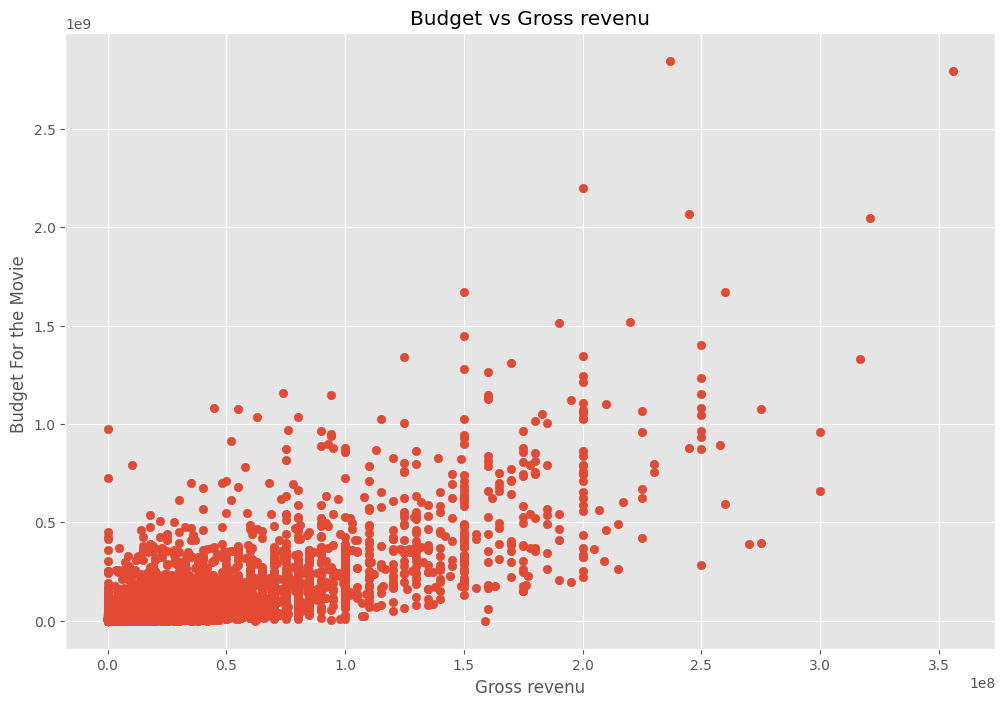

In [64]:
# Building scatter Plot with budget vs revenu 



plt.scatter(x=df['budget'], y =df['gross'] )
plt.title('Budget vs Gross revenu')
plt.xlabel('Gross revenu')
plt.ylabel('Budget For the Movie ')
plt.show()

In [ ]:
df.head()

<Axes: xlabel='budget', ylabel='gross'>

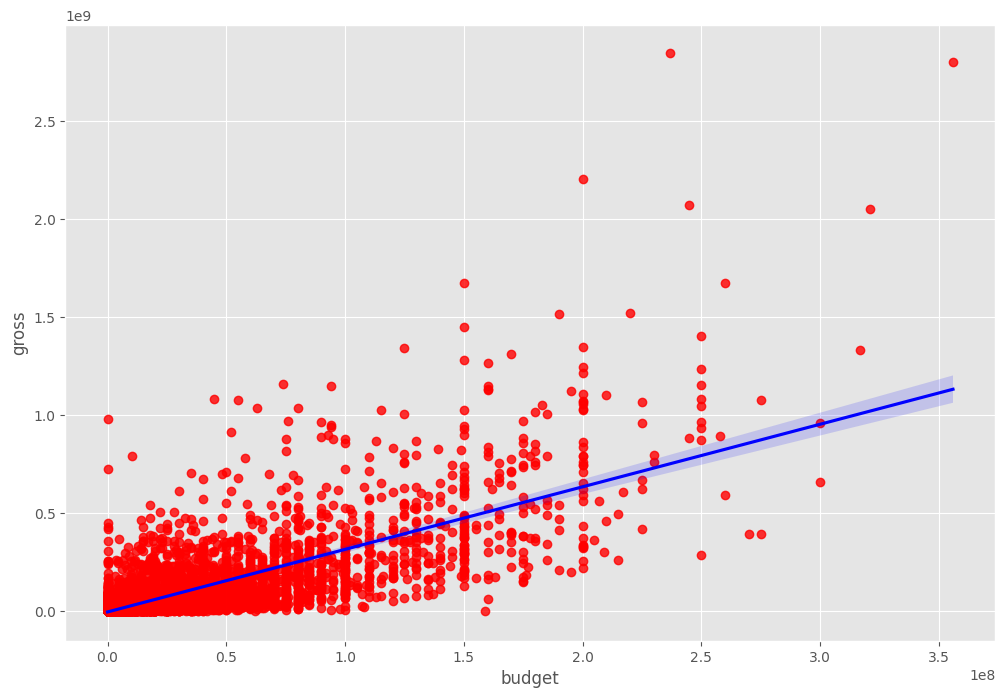

In [65]:
#Plot budget vs gross using  reg plot to check the correlation is positive or negative

sns.regplot(
    x='budget',
    y='gross',
    data=df,
    scatter_kws={"color": "red"},
    line_kws={"color": "blue"}
)

In [ ]:
#lets start looking at the actual correlation


In [ ]:
#cols to include in the correlation
df_corr_include =['budget' , 'gross' , 'runtime' , 'score' , 'votes','year']

In [ ]:
# Note what type of corr you use Pearson , kendale or spearman
#Note : pearson is senstive to outliers 
df_corr = df[df_corr_include].corr(method='pearson')

In [ ]:
df_corr

In [ ]:
#High Correlation Between Budget & Gross  As expected

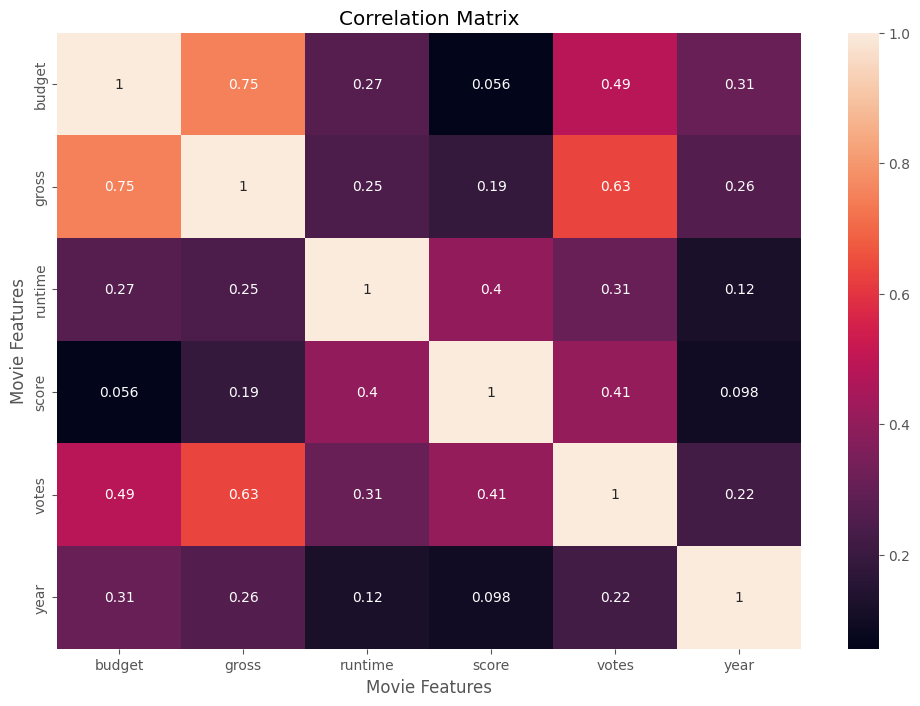

In [63]:
#Lets visualizethe correlation matrix 
correlation_matix = df[df_corr_include].corr(method='pearson')
sns.heatmap(correlation_matix , annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [ ]:
#looking at company but its not numeric so we should create a numeric representation of it to be able to see correlation

In [ ]:
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == "object"):
       df_numerized[col_name]=  df_numerized[col_name].astype('category')
       df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

In [ ]:
df

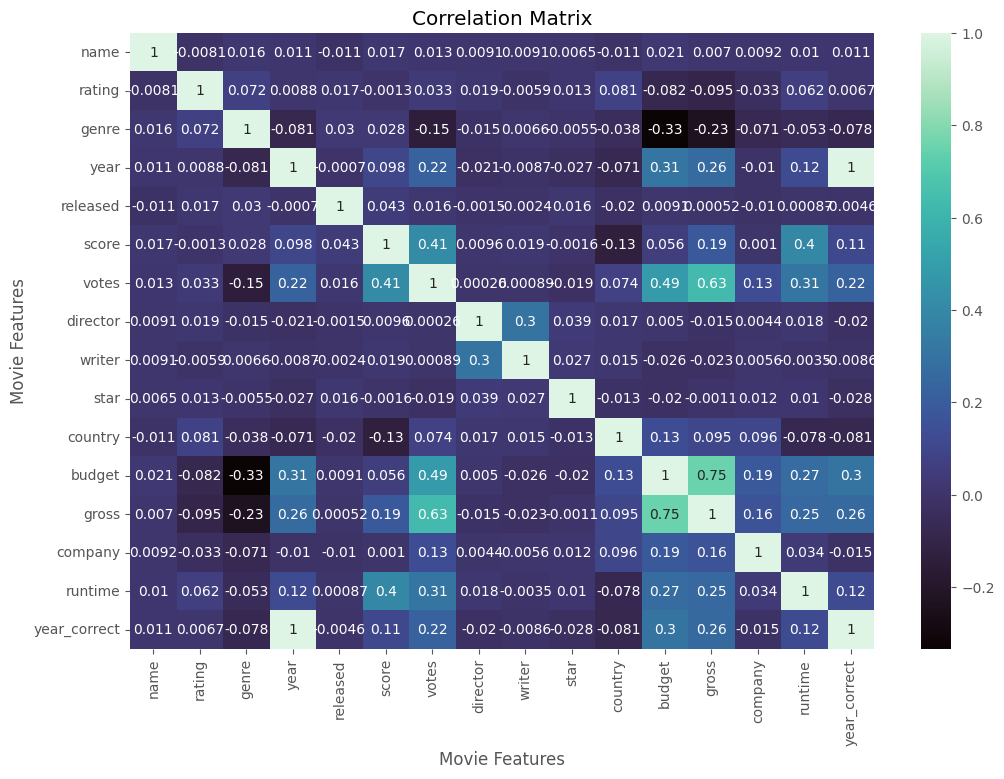

In [31]:
#Lets visualizethe correlation matrix 
correlation_matix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matix , annot=True, cmap='mako')
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [ ]:
# Displayting the matrix in pairs 
correlation_matix = df_numerized.corr()
corr_pairs = correlation_matix.unstack()
corr_pairs

name          name            1.000000
              rating         -0.008069
              genre           0.016355
              year            0.011453
              released       -0.011311
                                ...   
year_correct  budget          0.300066
              gross           0.255026
              company        -0.015171
              runtime         0.120636
              year_correct    1.000000
Length: 256, dtype: float64

In [ ]:
# sorting the matrix  pairs 
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget        genre          -0.334021
genre         budget         -0.334021
              gross          -0.234297
gross         genre          -0.234297
votes         genre          -0.145307
                                ...   
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
Length: 256, dtype: float64

In [ ]:
# finidng the highest correlation
high_corr = sorted_pairs[(sorted_pairs > 0.6) & (sorted_pairs < 1) ]
high_corr

votes         gross           0.632834
gross         votes           0.632834
budget        gross           0.750157
gross         budget          0.750157
year_correct  year            0.997415
year          year_correct    0.997415
dtype: float64

In [ ]:
#Conclusion
#Votes and budget have the highest correlation to gross earnings 

C:\Users\FeelT\AppData\Local\Temp\ipykernel_22252\2893319781.py:9: UserWarning: 
The palette list has fewer values (9) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(
c:\Users\FeelT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 88.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\FeelT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 85.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\FeelT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 45.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\FeelT\AppData\Loc

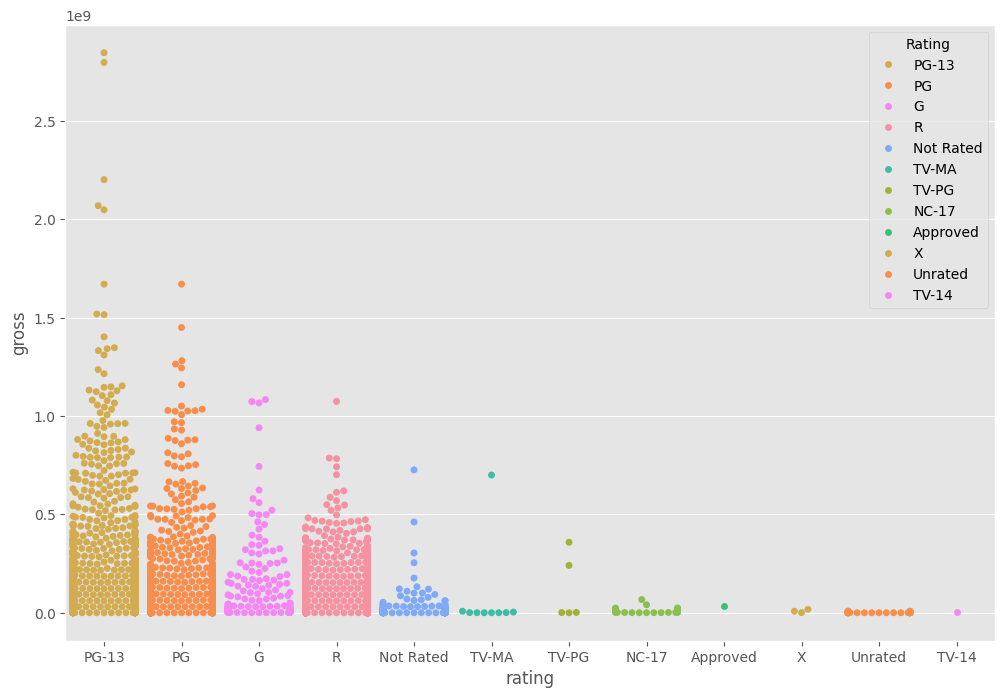

In [62]:
df_sample= df.sample() #random 2000 rows 

custom_colors = [
    "#d3ab50", "#f88e4b", "#f487f4", "#f592a2", 
    "#7eaaf6", "#3ebda3", "#a3b137", "#89c04f", "#38c079"
]


sns.swarmplot(
    x="rating", 
    y="gross", 
    data=df, 
    hue="rating",       
    dodge=False,         
    palette= custom_colors,     
    size=5               
)

plt.legend(title='Rating', bbox_to_anchor=(1, 1))  # optional legend outside
plt.show()


In [61]:
df.shape


(7668, 16)